# GLMM

測定できない・しなかった個体や調査地などに基づくデータ差異のモデル化

データになっている個体の属性（説明変数として使えるような）数量や因子は当てはまらない

In [1]:
options(repr.plot.width =5 , repr.plot.height = 5) # 図の大きさ

In [2]:
d <- read.csv("data.csv")
summary(d)

       N           y              x           id        
 Min.   :8   Min.   :0.00   Min.   :2   Min.   :  1.00  
 1st Qu.:8   1st Qu.:1.00   1st Qu.:3   1st Qu.: 25.75  
 Median :8   Median :3.00   Median :4   Median : 50.50  
 Mean   :8   Mean   :3.81   Mean   :4   Mean   : 50.50  
 3rd Qu.:8   3rd Qu.:7.00   3rd Qu.:5   3rd Qu.: 75.25  
 Max.   :8   Max.   :8.00   Max.   :6   Max.   :100.00  

In [3]:
fit <- glm(cbind(y, N-y) ~ x, data=d, family=binomial)
fit


Call:  glm(formula = cbind(y, N - y) ~ x, family = binomial, data = d)

Coefficients:
(Intercept)            x  
    -2.1487       0.5104  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    607.4 
Residual Deviance: 513.8 	AIC: 649.6

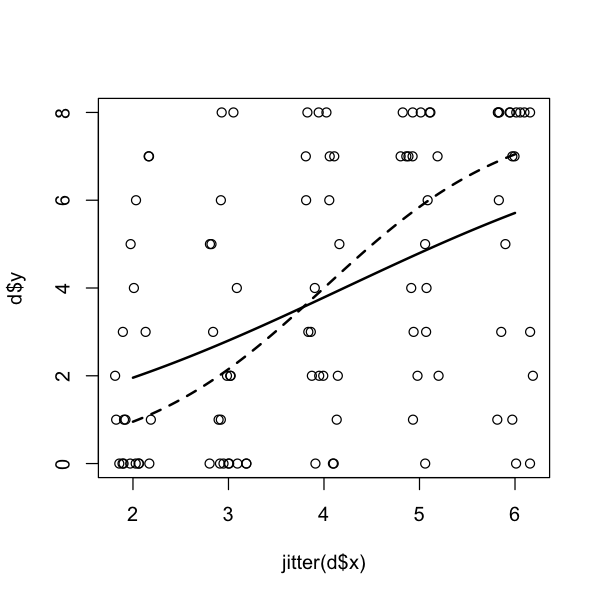

In [4]:
logistic <- function(z) 1 / (1 + exp(-z))
plot(jitter(d$x), d$y)
xx <- seq(min(d$x), max(d$x), length=100)
lines(xx, logistic(-2.1487 + 0.5104 * xx)*d$N, lwd=2)
lines(xx, logistic(-4 + 1 * xx)*d$N, lwd=2, lty=2)

In [5]:
d4 <- d[d$x ==4,]

In [6]:
table(d4$y)


0 1 2 3 4 5 6 7 8 
3 1 4 2 1 1 2 3 3 

In [7]:
c(mean(d4$y), var(d4$y))

[1] 4.050000 8.365789

In [8]:
library(glmmML)

In [9]:
fitC <- glmmML(cbind(y, N-y)~x, data=d, family=binomial, cluster=id)

ERROR: Error in .C("glmm_ml", as.integer(fam), as.integer(p), as.double(start.coef), :  "glmm_ml" は .C() に対しては (パッケージ "glmmML" に対して) 使えません 


In [26]:
fitC


Call:  glmmML(formula = cbind(y, N - y) ~ x, family = binomial, data = d,      cluster = id) 


              coef se(coef)      z Pr(>|z|)
(Intercept) -4.190   0.8777 -4.774 1.81e-06
x            1.005   0.2075  4.843 1.28e-06

Scale parameter in mixing distribution:  2.408 gaussian 
Std. Error:                              0.2202 

        LR p-value for H_0: sigma = 0:  2.136e-55 

Residual deviance: 269.4 on 97 degrees of freedom 	AIC: 275.4 